In [59]:
!pip install tensorflow keras nltk scikit-learn


In [60]:
import pandas as pd
import numpy as np
import re
import nltk
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [61]:
df = pd.read_csv("fake_news_dataset.csv", encoding='latin1', on_bad_lines='skip', engine='python')
df.head()

,title,text,label
0,NASA confirms new exoplanet with life signs,NASA revealed discovery of exoplanet capable o...,1
1,Donald Trump secretly met aliens in secret base,High classified documents claim Trump visited ...,0
2,WHO says vaccines reduced global mortality,WHO global reports show vaccination contribute...,1
3,Bill Gates plans microchip implants through va...,Rumors spread online claim Bill Gates wants to...,0
4,India GDP crosses 8% growth according to RBI,RBI reported improved GDP growth performance t...,1


In [62]:
df.describe()

,label
count,10.000000
mean,0.500000
std,0.527046
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [63]:
df.isnull().sum()


,0
title,0
text,0
label,0


In [64]:
df.columns

Index(['title', 'text', 'label'], dtype='object')

In [65]:
df['content'] = df['text'].astype(str) + " " + df['text'].astype(str)


In [67]:
#Tokenization
sample_data = "The quick brown fox jumps over the lazy dog"
sample_data = sample_data.split()
sample_data
#Make Lowercase
sample_data = [word.lower() for word in sample_data]
sample_data
#Remove Stopwords
import nltk
nltk.download('stopwords') # Add this line to download stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
sample_data = [word for word in sample_data if word not in stop_words]
sample_data
#Stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
sample_data = [stemmer.stem(word) for word in sample_data]
sample_data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['quick', 'brown', 'fox', 'jump', 'lazi', 'dog']

In [68]:
#Lemmatization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
sample_data = [lemmatizer.lemmatize(word) for word in sample_data]
sample_data

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['quick', 'brown', 'fox', 'jump', 'lazi', 'dog']

In [69]:
#Apply preprocessing on DF column
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    tokens = text.split()
    tokens = [stemmer.stem(lemmatizer.lemmatize(word)) for word in tokens if word not in stop_words]
    return ' '.join(tokens)
# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)
df.head(5)

,title,text,label,content,clean_text
0,NASA confirms new exoplanet with life signs,NASA revealed discovery of exoplanet capable o...,1,NASA revealed discovery of exoplanet capable o...,nasa reveal discoveri exoplanet capabl support...
1,Donald Trump secretly met aliens in secret base,High classified documents claim Trump visited ...,0,High classified documents claim Trump visited ...,high classifi document claim trump visit alien...
2,WHO says vaccines reduced global mortality,WHO global reports show vaccination contribute...,1,WHO global reports show vaccination contribute...,global report show vaccin contribut reduc death
3,Bill Gates plans microchip implants through va...,Rumors spread online claim Bill Gates wants to...,0,Rumors spread online claim Bill Gates wants to...,rumor spread onlin claim bill gate want contro...
4,India GDP crosses 8% growth according to RBI,RBI reported improved GDP growth performance t...,1,RBI reported improved GDP growth performance t...,rbi report improv gdp growth perform year


In [82]:
#Vectorization (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1,3))
X = tfidf.fit_transform(df['clean_text'])

In [83]:
#  Feature Extraction
y = df['label']
y

,label
0,1
1,0
2,1
3,0
4,1
5,0
6,1
7,0
8,1
9,0


In [84]:
# Split data
# model.fit(X_train, y_train)
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# X = tfidf.fit_transform(text_data)
# y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

pickle.dump(model, open("model.pkl","wb"))
pickle.dump(tfidf, open("tfidf.pkl","wb"))

print("✅ Model Saved")


✅ Model Saved


In [85]:
#Evaluate
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [75]:
import pickle
pickle.dump(tfidf, open("vectorizer.pkl","wb"))
pickle.dump(model, open("model.pkl","wb"))
pickle.dump(tfidf, open("tfidf.pkl","wb"))
pickle.dump(model, open("model.pkl","wb"))
print("Saved!")

Saved!


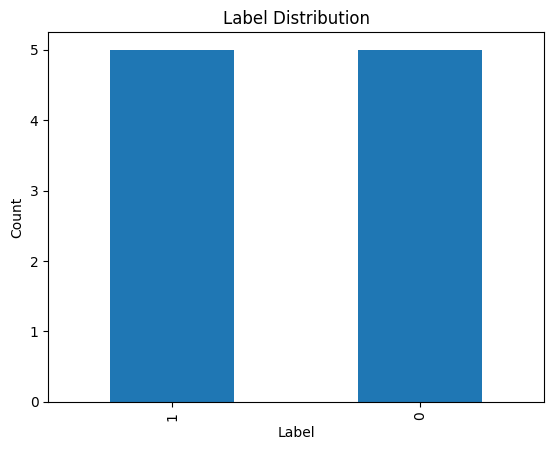

In [78]:
import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind='bar')
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


In [87]:
# # normal prediction
# y_test_pred = model.predict(X_test)

# # threshold tuning
# probs = model.predict_proba(X_test)[:,1]
# y_pred_new = (probs > 0.40).astype(int)

# # evaluation
# from sklearn.metrics import classification_report
# print("Classification Report (threshold = 0.40)")

# NASA successfully tests new Artemis moon lander engine ahead of 2026 mission WHO approves new malaria vaccine for children in Africa
#Social media posts claim govt is running device on time travel.


Classification Report (threshold = 0.40)


Please execute the cell where the `model` is defined and trained before running this cell.